# Classification Models


## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Database

In [ ]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

## Encode Values

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 6] = le.fit_transform(X[:, 6])
X[:, 8] = le.fit_transform(X[:, 8])
X[:, 9] = le.fit_transform(X[:, 9])
X[:, 10] = le.fit_transform(X[:, 10])

print(X[0])

[40 1 1 140 289 0 1 172 0 10 2]


## Check Best Features (Chi-Squared)

Rank 1: Feature Cholesterol (score: 2989.558811268769)
Rank 2: Feature Old Peak (score: 875.5830288000591)
Rank 3: Feature Max HR (score: 696.6503956279917)
Rank 4: Feature Chest Pain Type (score: 160.73687834127384)
Rank 5: Feature Exercise Angina (score: 133.64013403064604)
Rank 6: Feature Age (score: 121.28533766340712)
Rank 7: Feature ST Slope (score: 77.48668006913775)
Rank 8: Feature Fasting BS (score: 50.296983033264)
Rank 9: Feature Resting BP (score: 27.481226879083547)
Rank 10: Feature Sex (score: 18.006243160731916)
Rank 11: Feature Resting ECG (score: 1.2181357229212812)


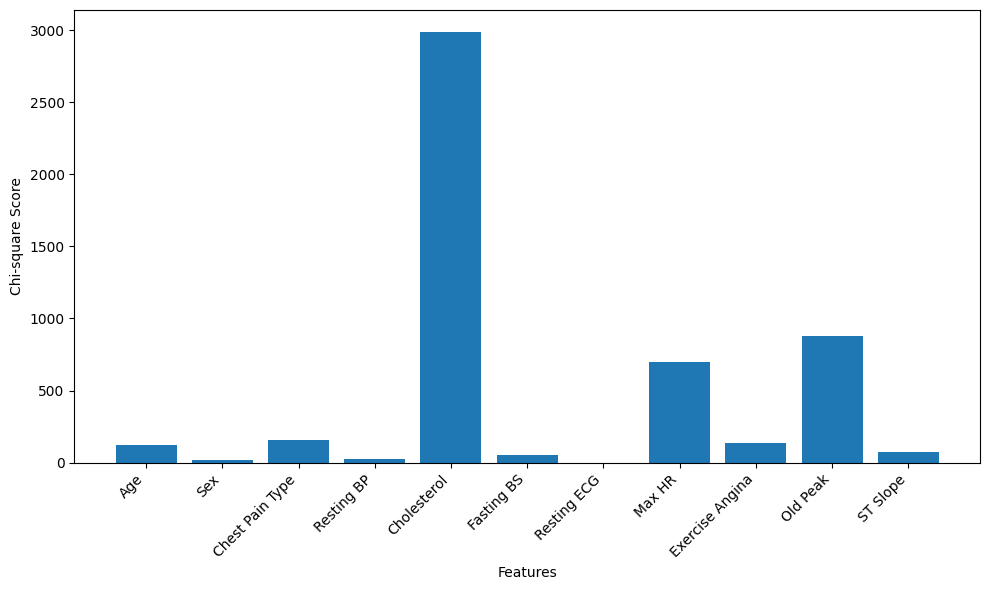

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit_transform(X,Y)
chi2_scores = chi2_selector.scores_
sorted_indices = np.argsort(chi2_scores)[::-1]

feature_names = ["Age","Sex","Chest Pain Type","Resting BP","Cholesterol","Fasting BS",
                     "Resting ECG","Max HR","Exercise Angina", "Old Peak", "ST Slope"]

for i , idx in enumerate(sorted_indices):
  print(f"Rank {i+1}: Feature {feature_names[idx]} (score: {chi2_scores[idx]})")

plt.figure(figsize=(10,6))
plt.bar(range(len(chi2_scores)), chi2_scores, align='center')
plt.xticks(range(len(chi2_scores)), feature_names, rotation=45, ha="right")
plt.xlabel('Features')
plt.ylabel('Chi-square Score')
plt.tight_layout()
plt.show()

## Divide the dataset into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Training

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_Model = LogisticRegression(random_state = 0)
log_Model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

deT_Model = DecisionTreeClassifier(criterion="entropy")
deT_Model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

### K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_Model = KNeighborsClassifier(n_neighbors=10)
knn_Model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_Model = SVC(kernel = 'poly', random_state=0)
svm_Model.fit(X_train, Y_train)

SVC(kernel='poly', random_state=0)

### Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

raF_Model = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
raF_Model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
model_list = [log_Model, deT_Model, knn_Model, svm_Model, raF_Model]

## Predict Results

In [ ]:
Y_pred = []
for i in range(len(model_list)):
  Y_pred.append(model_list[i].predict(X_test))

## Evaluate

[[61 16]
 [14 93]]
0.8369565217391305
[[63 14]
 [26 81]]
0.782608695652174
[[65 12]
 [20 87]]
0.8260869565217391
[[64 13]
 [16 91]]
0.842391304347826
[[61 16]
 [17 90]]
0.8206521739130435


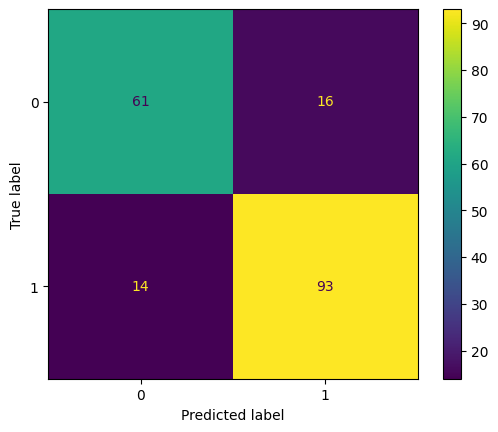

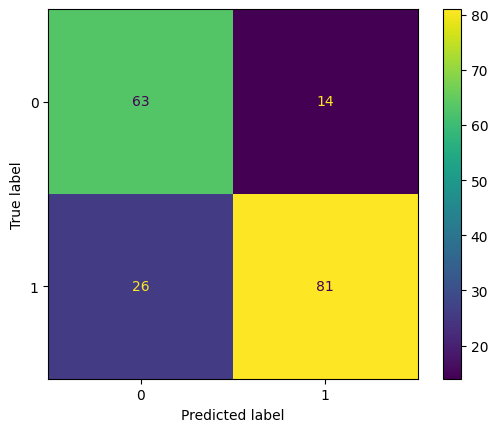

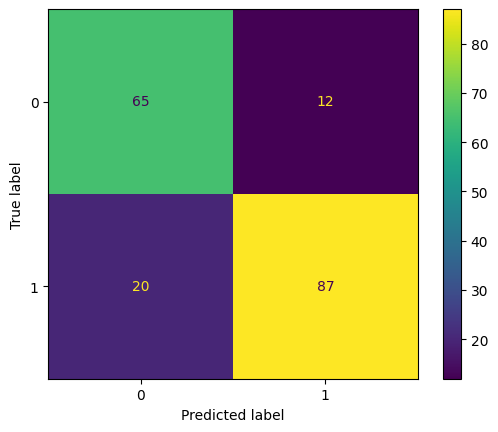

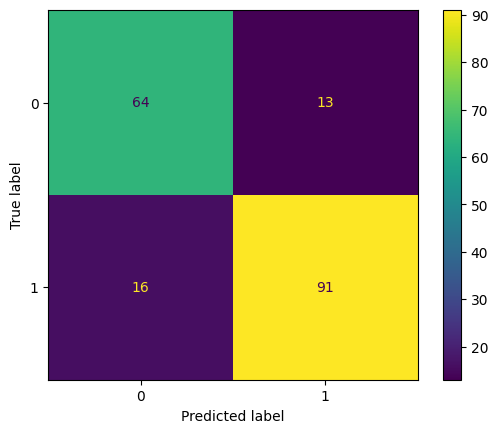

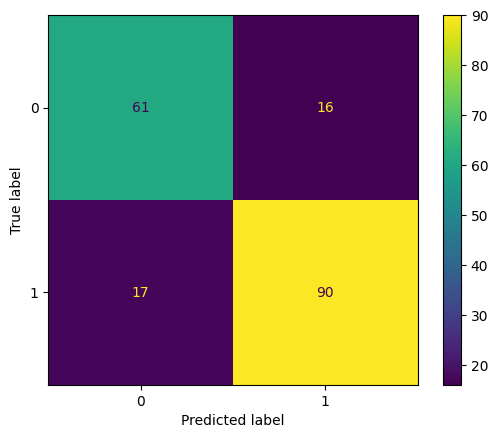

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from time import sleep

for i in range(len(model_list)):
  cm = confusion_matrix(Y_test, Y_pred[i])
  print(cm)
  print(accuracy_score(Y_test, Y_pred[i]))
  cm_display = ConfusionMatrixDisplay(cm).plot()